In [1]:
## feature distribution : do a pca plot (on original feat. set) & 
# check the distribution of data points for different classes

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import decomposition

## check if PCA scales the data internally, or scaling needs to be done

In [2]:
def get_pca(X_train):
    pca = decomposition.PCA()  # n_components = N; should be <= #features
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    #X_test_pca = pca.transform(X_test)
    print(pca.explained_variance_ratio_)
    
    ## plot PC variances
    pca_var = pca.explained_variance_ratio_
    indices = np.argsort(pca_var)[::-1]
    
    plt.figure()
    plt.title('PCA variance')
    plt.bar(range(X_train_pca.shape[1]), pca_var[indices], color='r', align ="center")
    plt.xticks(range(X_train_pca.shape[1]), indices)
    plt.xlim([-1, X_train_pca.shape[1]])
    plt.show()
    
    # Dump components relations with features:
    print(pd.DataFrame(pca.components_, columns = X_train.columns)) #,index = ['PC-1','PC-2'])
    # https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn


In [3]:
def get_pca_2(X_train):
    ## using 2 components
    pca = decomposition.PCA(n_components = 2)  # n_components = N; should be <= #features
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    #X_test_pca = pca.transform(X_test)
    return X_train_pca

In [4]:
## plot PCA-transformed data
def plot_pca2(X_train_pca, y_train):
    principalDf = pd.DataFrame(data = X_train_pca, columns = ['PC 1', 'PC 2'])
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    
    plt.scatter(finalDf['PC 1'], finalDf['PC 2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    plt.show()

In [5]:
### read in feature file ###
import pickle
file_location='C:/Users/DAR9KOR/Desktop/data/HEALTHCARE/EEG/data/eeg_epochs_dec12_2018/raw_data' 
os.chdir(file_location) #'/home/intern_eyecare/Desktop/EEG/sax_dimer' 

# remove 2nd night of subject 13, as there was data loss - pkl file created accordingly
dfull = pickle.load(open('Frac_sax_dimer_0.1s_EEG_all_patients.pkl', 'rb'))
dfull.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pID,day,epoch,class_label
0,0.110368,0.050167,0.016722,0.013378,0.066890,0.173913,0.060201,0.020067,0.010033,0.083612,0.163880,0.046823,0.003344,0.010033,0.063545,0.107023,400,1,s1e1,wake
1,0.090301,0.040134,0.020067,0.016722,0.050167,0.210702,0.080268,0.010033,0.020067,0.096990,0.170569,0.030100,0.006689,0.003344,0.046823,0.107023,400,1,s1e2,wake
2,0.130435,0.043478,0.003344,0.000000,0.040134,0.210702,0.053512,0.023411,0.006689,0.070234,0.167224,0.030100,0.000000,0.003344,0.050167,0.167224,400,1,s1e3,wake
3,0.123746,0.083612,0.030100,0.006689,0.050167,0.073579,0.076923,0.033445,0.050167,0.050167,0.110368,0.066890,0.020067,0.023411,0.060201,0.140468,400,1,s1e4,wake
4,0.100334,0.073579,0.050167,0.000000,0.046823,0.060201,0.096990,0.033445,0.056856,0.076923,0.133779,0.080268,0.020067,0.026756,0.063545,0.080268,400,1,s1e5,wake


In [6]:
# check data distribution
dfull.groupby('class_label').size()

class_label
sleep_stage_1     2804
sleep_stage_2    17799
wake             72391
dtype: int64

In [7]:
### convert from 3-class to 2-class ###
dfull['class2'] = dfull['class_label']
dfull['class2'] = [0 if x == 'wake' else 1 for x in dfull['class2']]

In [8]:
X_train = dfull.drop(['pID', 'day', 'epoch', 'class_label', 'class2'], 1)
y_train = dfull[['class2']]

[4.77258812e-01 2.19986102e-01 1.50962862e-01 4.77584659e-02
 2.92338312e-02 1.89282646e-02 1.51310043e-02 1.44021837e-02
 9.80552161e-03 7.36637390e-03 5.83916191e-03 3.10635938e-03
 9.82679713e-05 6.90001150e-05 5.37892216e-05 2.01338854e-31]


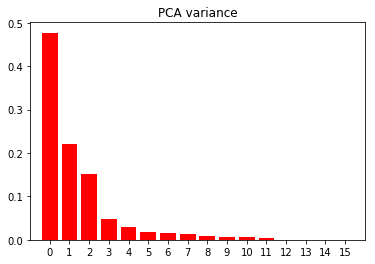

          0         1         2         3         4         5         6   \
0  -0.287770 -0.145281 -0.072554  0.002434 -0.123629  0.646203  0.109811   
1  -0.477954  0.073409  0.099793  0.002433  0.023489 -0.361599  0.379601   
2  -0.263311  0.032328  0.014936  0.048386  0.066417  0.574179  0.020139   
3  -0.476801  0.119178  0.213515  0.203203  0.298027 -0.032605 -0.596442   
4   0.300288 -0.012798  0.006231 -0.161696 -0.244232  0.216880 -0.108893   
5   0.206358 -0.626323  0.313856  0.295158 -0.276041 -0.041974 -0.232282   
6   0.048709  0.132851  0.052442  0.055131 -0.242893 -0.021083  0.143856   
7  -0.412652 -0.255231  0.130186 -0.076510 -0.458412 -0.055005  0.189970   
8   0.025312  0.320788 -0.405791  0.168280 -0.304135 -0.001472  0.101731   
9   0.107374 -0.066253  0.053678  0.490902  0.224786 -0.002659  0.195304   
10  0.105352  0.199359  0.578006 -0.487627  0.039522  0.070641 -0.022858   
11 -0.029924  0.159157  0.068271  0.119343 -0.176217 -0.033986 -0.075484   
12 -0.000143

In [9]:
get_pca(X_train)

In [10]:
X_train_pca2 = get_pca_2(X_train)
print(X_train_pca2)

[[-0.01084161 -0.01329102]
 [ 0.03522448 -0.01105331]
 [ 0.0016238  -0.08376363]
 ...
 [-0.0926115   0.06474099]
 [-0.06378953  0.12570721]
 [-0.03469669  0.11970845]]


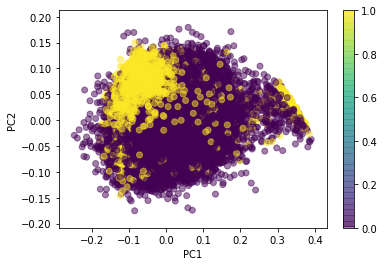

In [11]:
plot_pca2(X_train_pca2, y_train)

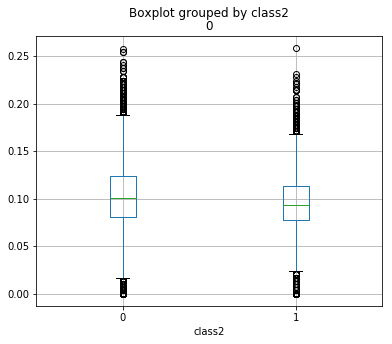

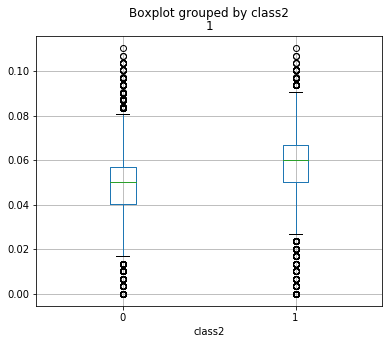

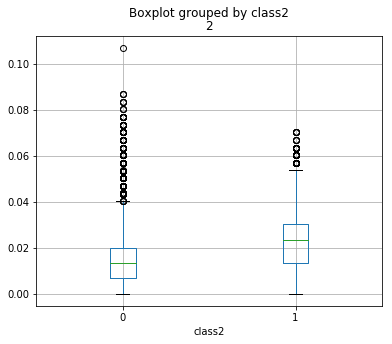

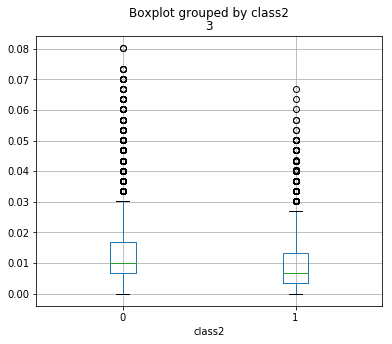

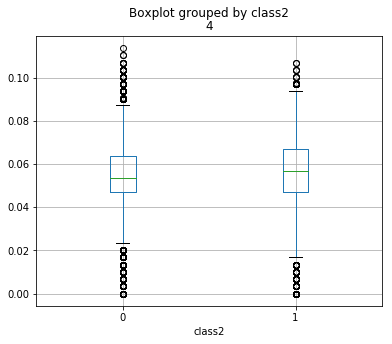

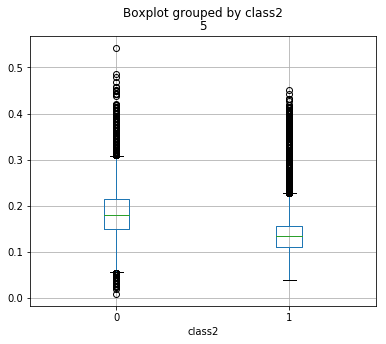

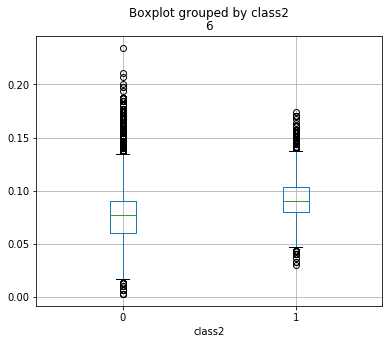

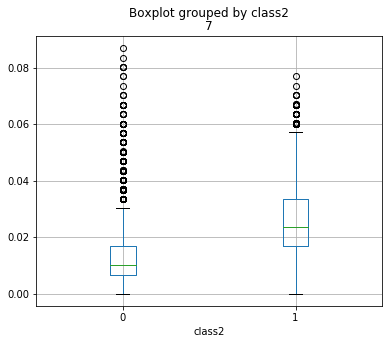

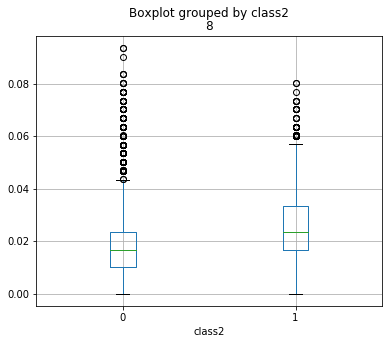

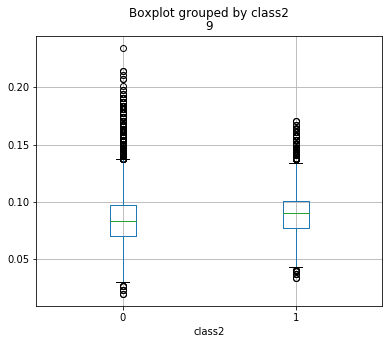

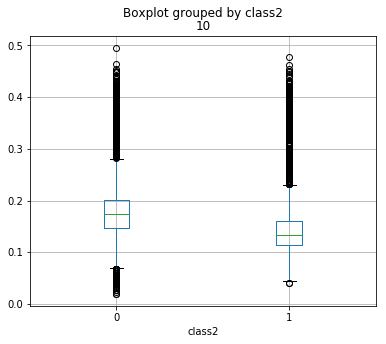

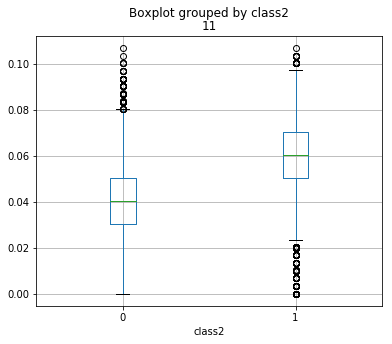

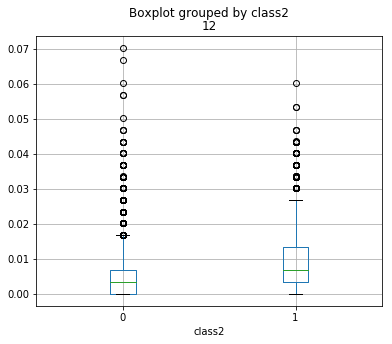

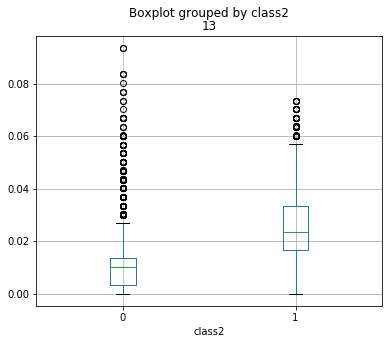

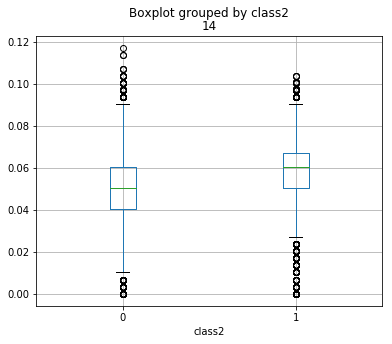

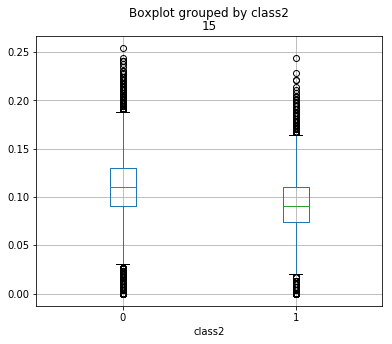

In [15]:
df_list = dfull.columns.tolist()
for i in range(0,16):
    fig, ax = plt.subplots(figsize=(6,5))
    plt.suptitle(df_list[i])
    dfull.boxplot(column=df_list[i], by='class2', ax=ax)
    plt.show()

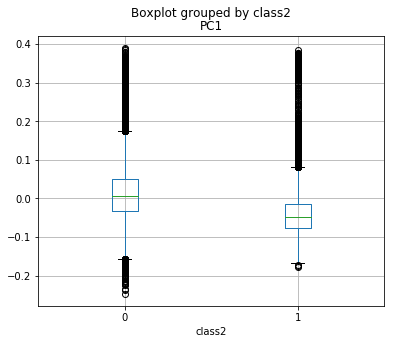

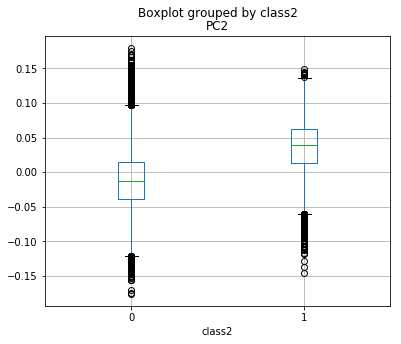

In [16]:
## box-plot of PC1 & PC2 by class

X_tr = pd.DataFrame((X_train_pca2))
X_tr = pd.concat([X_tr, dfull['class2']], axis=1)
X_tr.columns = ['PC1', 'PC2', 'class2']
X_tr_list = X_tr.columns.tolist()

for i in range(0,2):
    fig, ax = plt.subplots(figsize=(6,5))
    plt.suptitle(X_tr_list[i])
    X_tr.boxplot(column = X_tr_list[i], by='class2', ax=ax)
    plt.show()

In [17]:
## try 3 PCs
pca3 = decomposition.PCA(n_components = 3)  # n_components = N; should be <= #features
pca3.fit(X_train)
X_train_pca3 = pca3.transform(X_train)
X_train_pca3

array([[-0.01084161, -0.01329102,  0.00116378],
       [ 0.03522448, -0.01105331,  0.02141218],
       [ 0.0016238 , -0.08376363,  0.0131989 ],
       ...,
       [-0.0926115 ,  0.06474099,  0.00242455],
       [-0.06378953,  0.12570721,  0.03510564],
       [-0.03469669,  0.11970845,  0.05770318]])

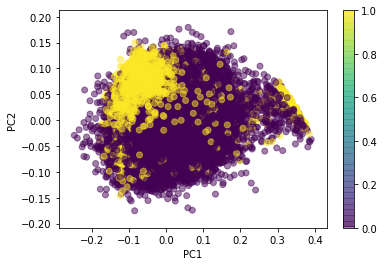

In [19]:
X_tr3 = pd.DataFrame(X_train_pca3)
X_tr3.columns = ['PC1', 'PC2', 'PC3']
principalDf = X_tr3[['PC1', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC1'], finalDf['PC2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

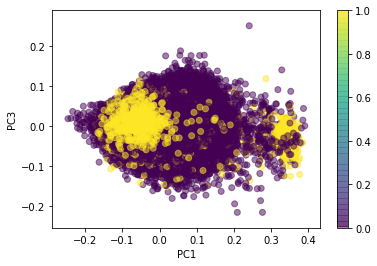

In [20]:
principalDf = X_tr3[['PC1', 'PC3']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC1'], finalDf['PC3'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.colorbar()
plt.show()

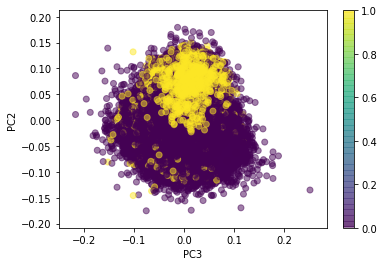

In [21]:
principalDf = X_tr3[['PC3', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC3'], finalDf['PC2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC3')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [ ]:
## find similar feature vectors for the 2 classes, from   i. same patient  ii. different patient

In [22]:
# distance calculation: within each class
# segregate data by class
df0 = dfull[(dfull.class2) == 0]
df0.reset_index(inplace=True, drop=True)
df0.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,pID,day,epoch,class_label,class2
0,0.110368,0.050167,0.016722,0.013378,0.066890,0.173913,0.060201,0.020067,0.010033,0.083612,...,0.046823,0.003344,0.010033,0.063545,0.107023,400,1,s1e1,wake,0
1,0.090301,0.040134,0.020067,0.016722,0.050167,0.210702,0.080268,0.010033,0.020067,0.096990,...,0.030100,0.006689,0.003344,0.046823,0.107023,400,1,s1e2,wake,0


In [24]:
df0.shape

(72391, 21)

In [29]:
dfull.dtypes

0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
pID             object
day             object
epoch           object
class_label     object
class2           int64
dtype: object

In [30]:
df0 = dfull[ (dfull.class2 == 0) & (dfull.pID == '400') ]
df0.reset_index(inplace=True, drop=True)
df0.shape

(3882, 21)

In [23]:
df1 = dfull[(dfull.class2) == 1]
df1.reset_index(inplace=True, drop=True)
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,pID,day,epoch,class_label,class2
0,0.050167,0.053512,0.033445,0.016722,0.050167,0.157191,0.113712,0.033445,0.043478,0.103679,...,0.060201,0.013378,0.040134,0.056856,0.060201,400,1,s1e1,sleep_stage_1,1
1,0.063545,0.066890,0.026756,0.020067,0.063545,0.107023,0.093645,0.056856,0.030100,0.103679,...,0.056856,0.020067,0.046823,0.066890,0.026756,400,1,s1e2,sleep_stage_1,1


In [25]:
df1.shape

(20603, 21)

In [ ]:
from numpy.linalg import norm

#rel_cols = ['A660_80', 'A590_80', 'A940_80', 'A810_80',
#       'R100_940_660', 'R80_660_590', 'R90_660_590', 'R80_940_590',
#       'R90_940_590', 'R70_810_590', 'R80_810_590', 'R80_660_810',
#       'R90_660_810']

columns=['pID1','day1','epoch1','status1','pID2','day2','epoch2','status2','euclidean']

In [ ]:
def distance_within(df1):
    result = pd.DataFrame()
    
    for i in range(0, len(df1)-1):
        for j in range(1, len(df1)):
            if j > i:
                res = [df1.loc[i,'sr'], df1.loc[i,'dev'], df1.loc[i,'algo'], df1.loc[i,'status']]
                arr1 = df1.loc[i,rel_cols].values
                
                res = res + [df1.loc[j,'sr'], df1.loc[j,'dev'], df1.loc[j,'algo'], df1.loc[j,'status']] #
                arr2 = df1.loc[j,rel_cols].values
                
                cs = round(cos_sim(arr1.reshape(1, -1), arr2.reshape(1, -1))[0][0], 4)
                no = norm(arr1-arr2)
                
                res = res + [cs, no]
                result = result.append([res])
    
    result.columns = columns    
    return result

In [ ]:
result_2_2 = distance_within(df2)
plt.hist(result_2_2['euclidean'], bins=30)
plt.show()

In [ ]:
## check if PCA canges with explicit scaling